## Import Libraries

In [1]:
#!pip install scipy==1.11.4
#!pip install dalex
#!pip install scikit-plot
#!pip install shap
#!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=83923081fcfbbc5792c64c8df6acc1711225e2834bcc61d6040a66fb946f99e6
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=137ab7ad85af3602ea6fc2960e3aa5ad23d6623ba1751e1ace95a5f9c29df82a
  Stored in dire

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import scikitplot as skplt
from xgboost import XGBClassifier
import dalex as dx

## Load Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv')
data.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**Data Dictionary:**
- user_id: customer account number
- attrition_flag: customer status (Existing and Attrited)
- customer_age: age of the customer
- gender: gender of customer (M for male and F for female)
- dependent_count: number of dependents of customers
- education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown)
- marital_status: customer's marital status (Single, Married, Divorced, and Unknown)
- income_category: customer income interval category (Less than `$40K`, `$40K-$60k`, `$60K-$80K`, `$80K-$120K`, `$120K +`, and Unknown)
- card_category: type of card used (Blue, Silver, Gold, and Platinum)
- months_on_book: period of being a customer (in months)
- total_relationship_count: the number of products used by customers in the bank
- months_inactive_12_mon: period of inactivity for the last 12 months
- contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months
- credit_limit: credit card transaction nominal limit in one period
- total_revolving_bal: total funds used in one period
- avg_open_to_buy: the difference between the credit limit set for the cardholder'saccount and the current balance
- total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1
- total_trans_amt: total nominal transaction in the last 12 months
- total_trans_ct: the number of transactions in the last 12 months
- total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1
- avg_utilization_ratio: percentage of credit card usage

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

### Data Cleaning

In [5]:
#check duplicates
data.duplicated().sum()

0

In [6]:
#check missing
data.isnull().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [7]:
#drop uneccessary column
data = data.drop(columns=['user_id'], axis = 1)

In [8]:
#encode the target variable to 0 and 1
data['attrition_flag'] = data['attrition_flag'].apply(lambda x: 1 if x == 'Existing Customer' else 0)

In [9]:
#one-hot encoding for non ordinal categorical variables
data_encoded = pd.get_dummies(data, columns=['gender', 'marital_status'])
data_encoded.head()

,attrition_flag,customer_age,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,...,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,1,45,3,High School,$60K - $80K,Blue,39,5,1,3,...,1144,42,1.625,0.061,False,True,False,True,False,False
1,1,49,5,Graduate,Less than $40K,Blue,44,6,1,2,...,1291,33,3.714,0.105,True,False,False,False,True,False
2,1,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,...,1887,20,2.333,0.000,False,True,False,True,False,False
3,1,40,4,High School,Less than $40K,Blue,34,3,4,1,...,1171,20,2.333,0.760,True,False,False,False,False,True
4,1,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,...,816,28,2.500,0.000,False,True,False,True,False,False


### Train-Test Split

In [10]:
#features
X = data_encoded.drop(['attrition_flag'], axis = 1)
#target
y = data_encoded['attrition_flag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state= 42)

### Label Encoding

In [12]:
#label encoding ordinal categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_le = LabelEncoder()
label_mappings={}

for col in categorical_columns:
    X_train[col] = X_le.fit_transform(X_train[col])
    label_mappings[col] = dict(zip(X_le.classes_, range(len(X_le.classes_))))
    X_test[col] = X_le.transform(X_test[col])

for col, mapping in label_mappings.items():
    print(f"{col} mapping: {mapping}")

education_level mapping: {'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
income_category mapping: {'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}
card_category mapping: {'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 1602 to 3640
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              8101 non-null   int64  
 1   dependent_count           8101 non-null   int64  
 2   education_level           8101 non-null   int64  
 3   income_category           8101 non-null   int64  
 4   card_category             8101 non-null   int64  
 5   months_on_book            8101 non-null   int64  
 6   total_relationship_count  8101 non-null   int64  
 7   months_inactive_12_mon    8101 non-null   int64  
 8   contacts_count_12_mon     8101 non-null   int64  
 9   credit_limit              8101 non-null   float64
 10  total_revolving_bal       8101 non-null   int64  
 11  avg_open_to_buy           8101 non-null   float64
 12  total_amt_chng_q4_q1      8101 non-null   float64
 13  total_trans_amt           8101 non-null   int64  
 14  total_tran

## Exploratory Data Analysis

### Univariate Analysis

In [14]:
X_train.describe()

,customer_age,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.327120,2.350574,3.106777,2.851376,0.183187,35.938279,3.820886,2.335514,2.449944,8636.210838,1162.422540,7473.788298,0.759994,4393.027034,64.752253,0.711916,0.274138
std,7.985768,1.296832,1.848143,1.508128,0.700101,7.957442,1.547005,1.002347,1.103919,9107.980541,814.680244,9107.090992,0.219483,3396.981611,23.486066,0.238334,0.274709
min,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,530.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,2.000000,1.000000,0.000000,32.000000,3.000000,2.000000,2.000000,2553.000000,357.000000,1335.000000,0.631000,2151.000000,45.000000,0.583000,0.023000
50%,46.000000,2.000000,3.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1279.000000,3451.000000,0.738000,3890.000000,67.000000,0.700000,0.176000
75%,52.000000,3.000000,5.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.000000,1781.000000,9885.000000,0.860000,4730.000000,80.000000,0.818000,0.503000
max,73.000000,5.000000,6.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.571000,0.999000


array([[<Axes: title={'center': 'customer_age'}>,
        <Axes: title={'center': 'dependent_count'}>,
        <Axes: title={'center': 'education_level'}>,
        <Axes: title={'center': 'income_category'}>],
       [<Axes: title={'center': 'card_category'}>,
        <Axes: title={'center': 'months_on_book'}>,
        <Axes: title={'center': 'total_relationship_count'}>,
        <Axes: title={'center': 'months_inactive_12_mon'}>],
       [<Axes: title={'center': 'contacts_count_12_mon'}>,
        <Axes: title={'center': 'credit_limit'}>,
        <Axes: title={'center': 'total_revolving_bal'}>,
        <Axes: title={'center': 'avg_open_to_buy'}>],
       [<Axes: title={'center': 'total_amt_chng_q4_q1'}>,
        <Axes: title={'center': 'total_trans_amt'}>,
        <Axes: title={'center': 'total_trans_ct'}>,
        <Axes: title={'center': 'total_ct_chng_q4_q1'}>],
       [<Axes: title={'center': 'avg_utilization_ratio'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

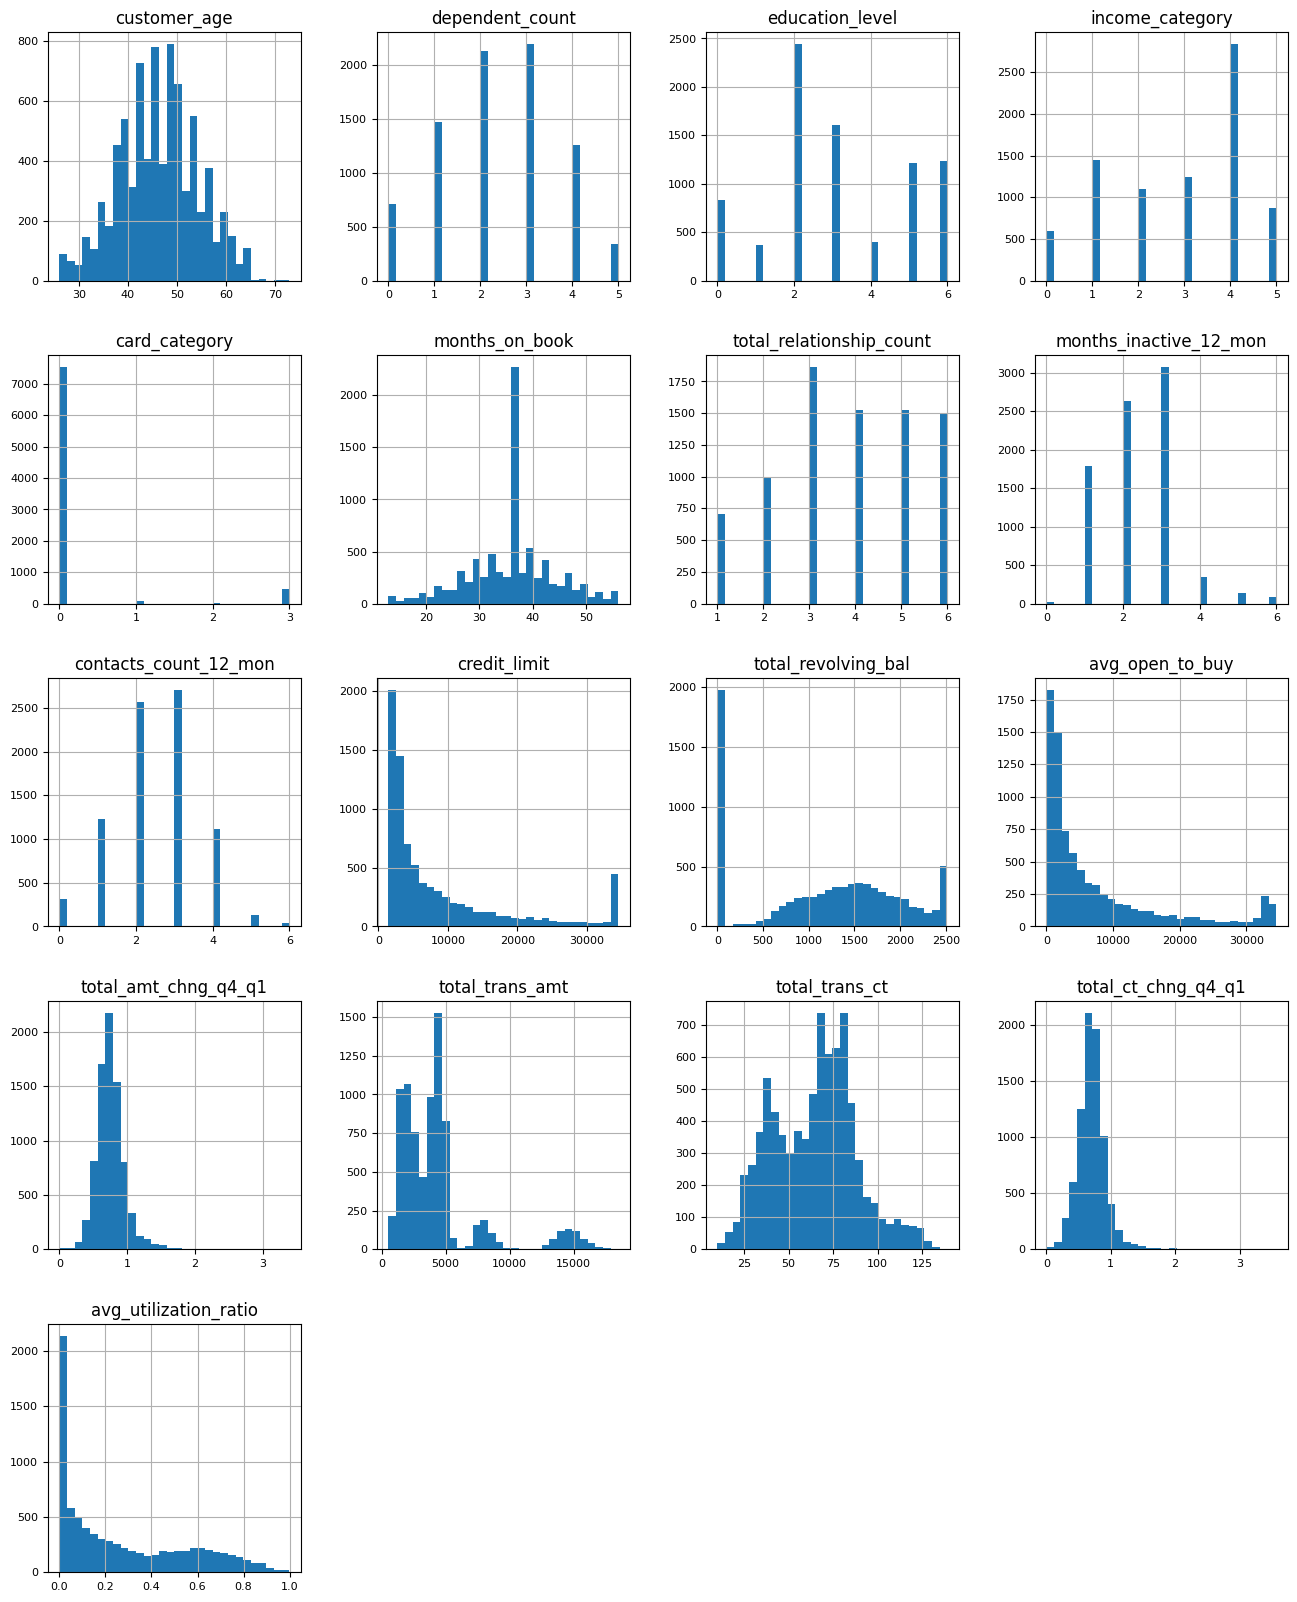

In [15]:
X_train.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8)

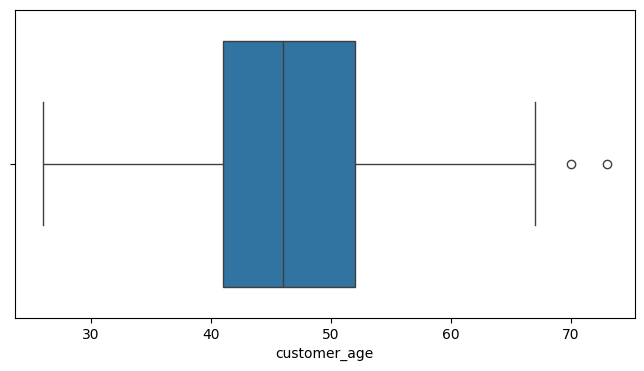

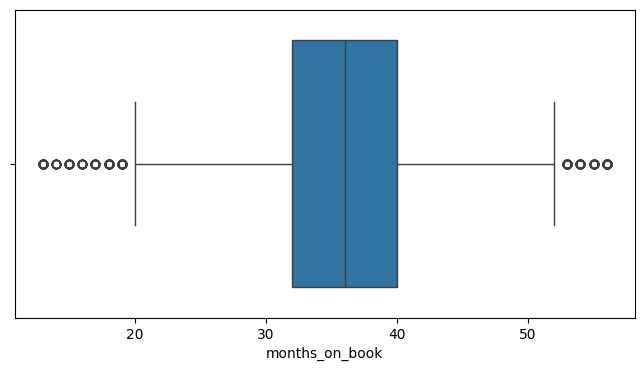

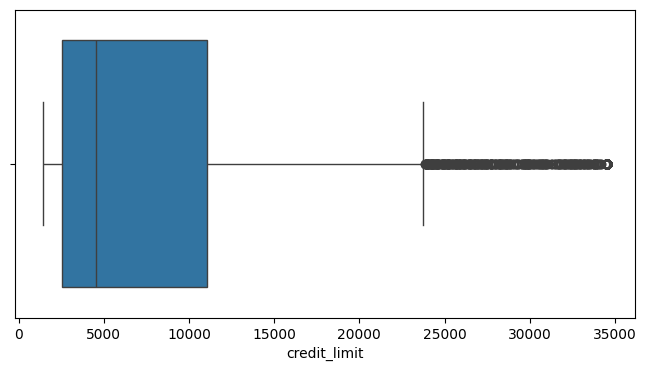

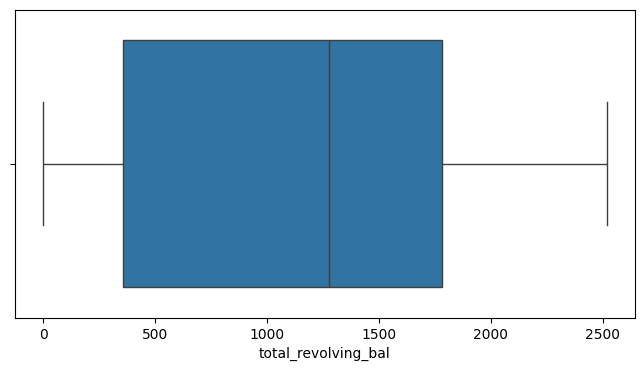

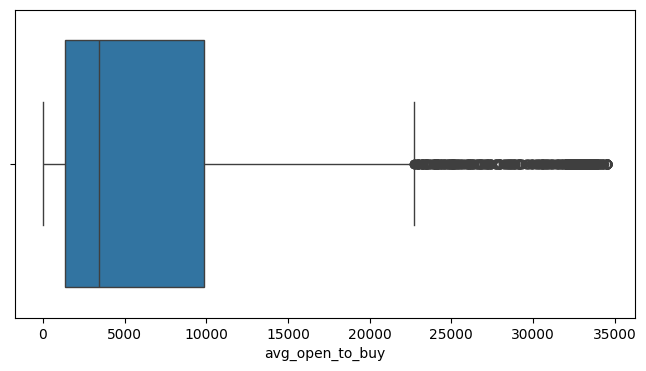

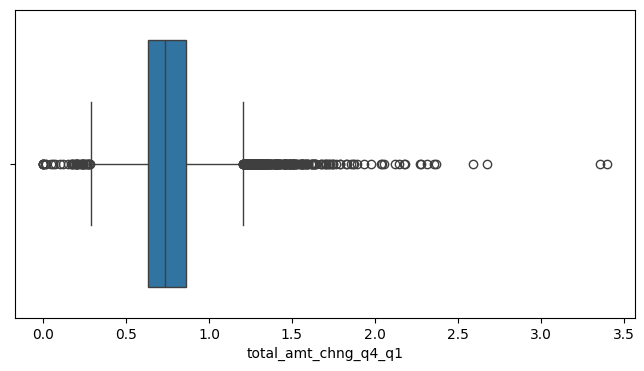

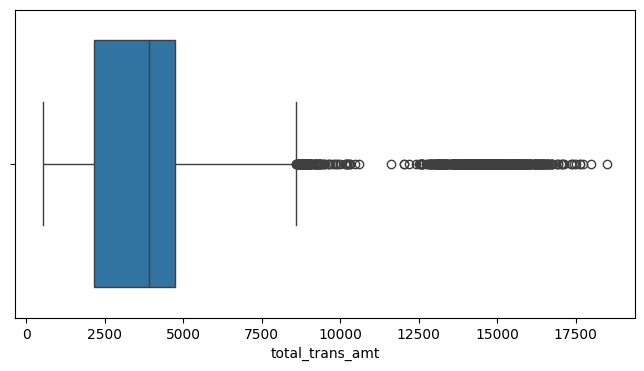

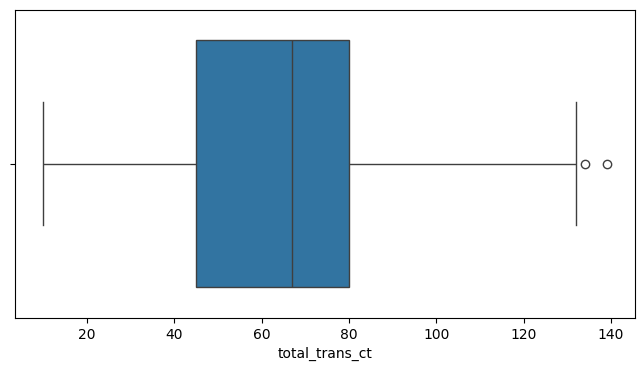

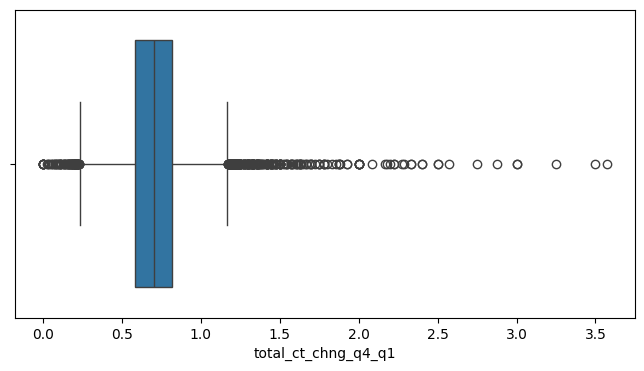

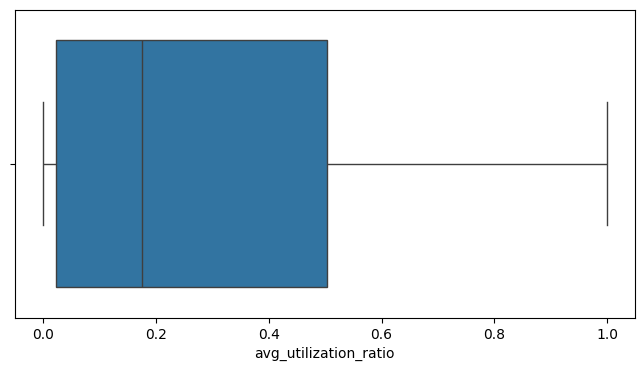

In [16]:
numerical_data = X_train[['customer_age','months_on_book','credit_limit','total_revolving_bal',
                          'avg_open_to_buy','total_amt_chng_q4_q1','total_trans_amt',
                          'total_trans_ct','total_ct_chng_q4_q1','avg_utilization_ratio']]

for column in numerical_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numerical_data[column])
    plt.show()

#### Log Transformation

In [17]:
#train data
X_train['credit_limit'] = np.log(X_train['credit_limit'] + 1)
X_train['avg_open_to_buy'] = np.log(X_train['avg_open_to_buy'] + 1)
X_train['total_amt_chng_q4_q1'] = np.log(X_train['total_amt_chng_q4_q1'] + 1)
X_train['total_trans_amt'] = np.log(X_train['total_trans_amt'] + 1)
X_train['total_trans_amt'] = np.log(X_train['total_trans_amt'] + 1)
X_train['total_ct_chng_q4_q1'] = np.log(X_train['total_ct_chng_q4_q1'] + 1)

#test data
X_test['credit_limit'] = np.log(X_test['credit_limit'] + 1)
X_test['avg_open_to_buy'] = np.log(X_test['avg_open_to_buy'] + 1)
X_test['total_amt_chng_q4_q1'] = np.log(X_test['total_amt_chng_q4_q1'] + 1)
X_test['total_trans_amt'] = np.log(X_test['total_trans_amt'] + 1)
X_test['total_trans_amt'] = np.log(X_test['total_trans_amt'] + 1)
X_test['total_ct_chng_q4_q1'] = np.log(X_test['total_ct_chng_q4_q1'] + 1)

### Multivariate Analysis

**Distribution of Customer Age and Attrition Probability**


<ipython-input-18-49b25f6ed60e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['customer_age'],ax=axs[0])


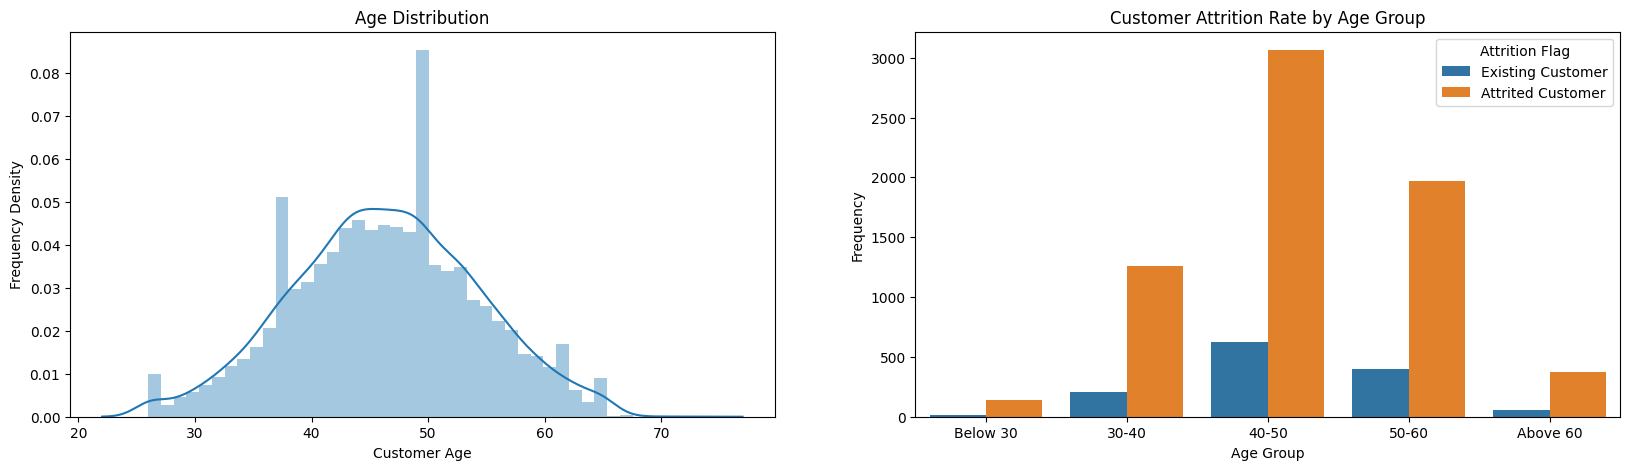

In [18]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

#plot barchart for customer_age
sns.distplot(X_train['customer_age'],ax=axs[0])
axs[0].set_title('Age Distribution')
axs[0].set_ylabel('Frequency Density')
axs[0].set_xlabel('Customer Age')

#assign age group
def assign_age_group(age):
    if age < 30:
        return 'Below 30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    elif 50 <= age < 60:
        return '50-60'
    else:
        return 'Above 60'

X_train['age_group'] = X_train['customer_age'].apply(assign_age_group)
age_attr_data = pd.concat([X_train['age_group'], y_train], axis=1)
age_attr_data.columns = ['age_group', 'attrition_flag']

#create barchart for age group and attrition
sns.countplot(data=age_attr_data, x='age_group', hue='attrition_flag', order=['Below 30', '30-40', '40-50', '50-60','Above 60'], ax=axs[1])
axs[1].set_title('Customer Attrition Rate by Age Group')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Frequency')
axs[1].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

The age distribution shows that most customers fall between the ages of 40 and 55. Among these, customers in the 40–50 age group exhibit a noticeably higher attrition rate compared to other age groups. Younger customers of age group 30-40 and customers of age group 50-60 also display a moderate attriting tendency, while customers below 30 years and above 60 years have a lower likelihood of leaving. This suggests that targeting retention efforts toward customers in their 40s could be effective in reducing overall attrition rates.

In [25]:
X_train = X_train.drop(columns='age_group', axis = 1)

**Correlation Between Education Level and Income Category, and Their Impact on Attrition**

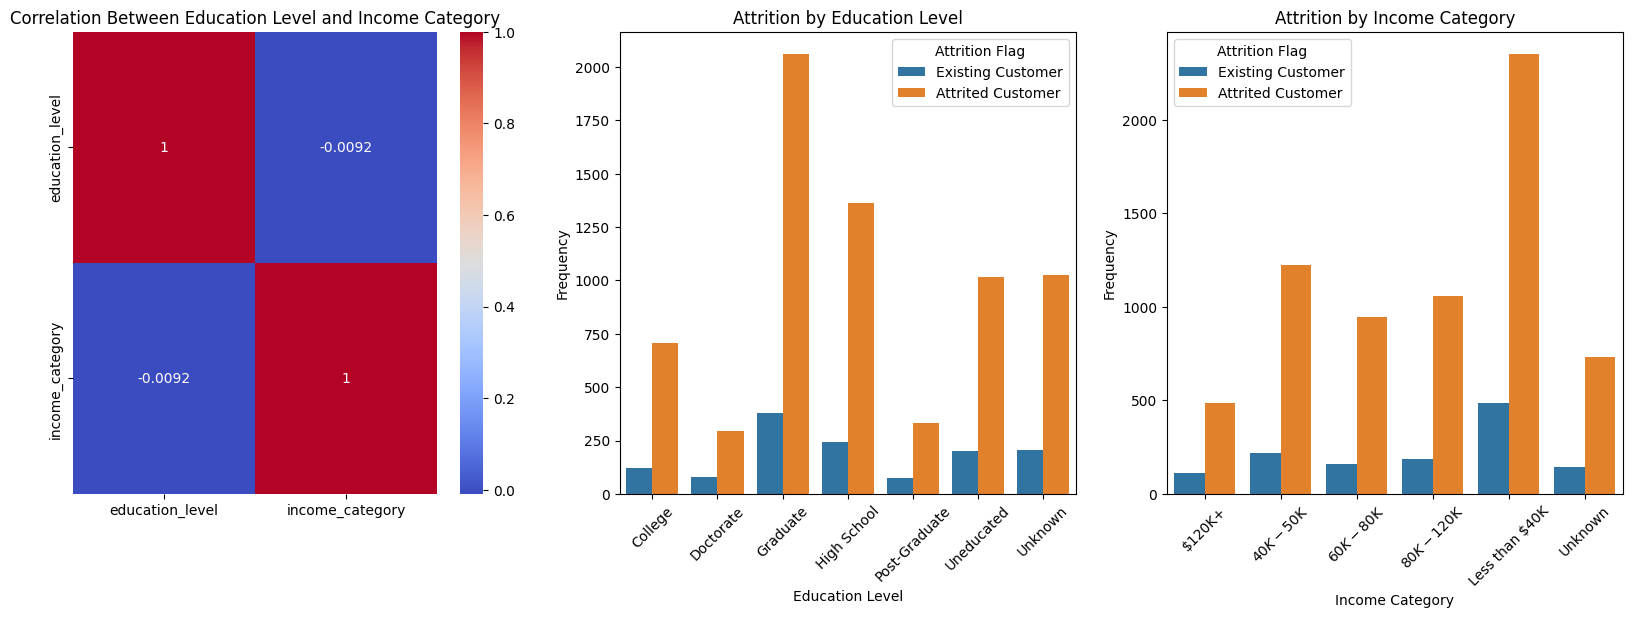

In [20]:
fig, axs = plt.subplots(1,3, figsize=(20,6))

#create heatmap
corr = X_train[['education_level', 'income_category']].corr()
sns.heatmap(corr, annot = True ,cmap = 'coolwarm', ax=axs[0])
axs[0].set_title('Correlation Between Education Level and Income Category')

#plot barchart for education level vs churn
sns.countplot(x=X_train['education_level'], hue=y_train, ax=axs[1])
axs[1].set_title('Attrition by Education Level')
axs[1].set_xlabel('Education Level')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks([0, 1, 2, 3, 4, 5, 6], ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown'], rotation = 45)
axs[1].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

#plot barchart for income category vs churn
sns.countplot(x=X_train['income_category'], hue=y_train, ax=axs[2])
axs[2].set_title('Attrition by Income Category')
axs[2].set_xlabel('Income Category')
axs[2].set_ylabel('Frequency')
axs[2].set_xticks([0, 1, 2, 3, 4, 5], ['$120K+', '$40K-$50K', '$60K-$80K', '$80K-$120K', 'Less than $40K', 'Unknown'], rotation = 45)
axs[2].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

Based on the analysis of the graphs, there is a weak correlation between education level and income category, as indicated by the heatmap. The customer's education level does not affect their income category. The count plots reveal that attrition rates vary across different education levels, with "Graduates" and "High School" exhibiting higher attrition rates, while "Doctorate" and "Post-Graduate" has a lower attrition rate. Similarly, the income category analysis shows that customers in lower income brackets of "Less than \$40K"are more likely to churn, indicating a potential link between financial stability and customer retention. Overall, both education and income appear to play significant roles in predicting customer attrition.

**Gender and Attrition Probability**

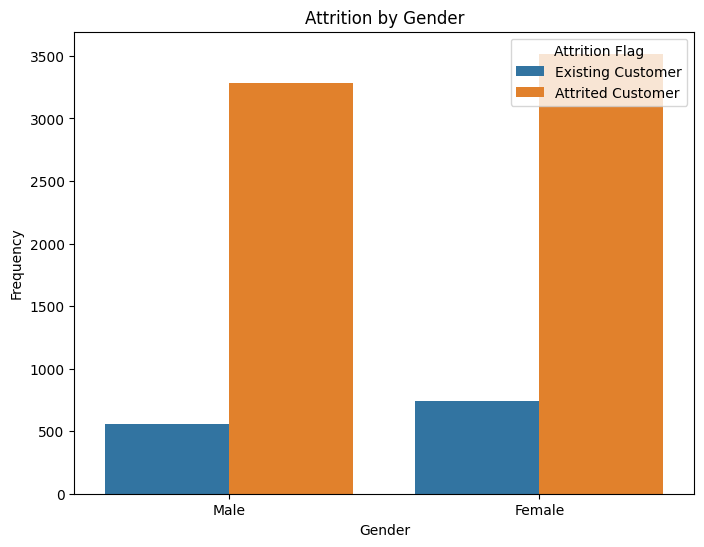

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x=X_train['gender_F'], hue=y_train)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

The analysis of customer attrition by gender reveals that there is a noticeable difference in the likelihood of attrition between male and female customers. The count plot indicates that while both genders have existing customers, the frequency of attrition is higher among females compared to males. This suggests that gender may play a role in customer retention, with female customers demonstrating a greater tendency to churn. Therefore, targeted strategies may be needed to address the factors influencing female customer attrition and enhance retention efforts.

**Customer Tenure and Attrition Probability**

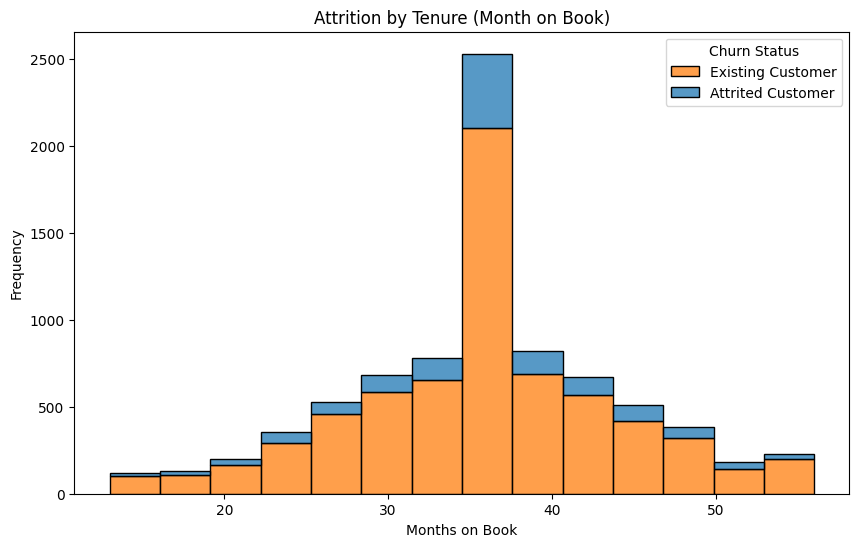

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='months_on_book', hue=y_train, multiple='stack', binwidth = 3)
plt.title('Attrition by Tenure (Month on Book)')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')
plt.legend(title='Churn Status', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

The histogram shows customers in the 30-40 month range have the highest frequency of attrition. There is a noticeable decline in churn rates for those who have been customers for more than 40 months or less than 30 months. This suggests that although some customers may leave after a few years, long-term customers exhibit lower attrition rates, indicating that longer engagement may foster loyalty.  Understanding the factors influencing a within the initial years could help the bank improve retention strategies and enhance customer loyalty over time.

**Interaction Frequency and Attrition Probability**

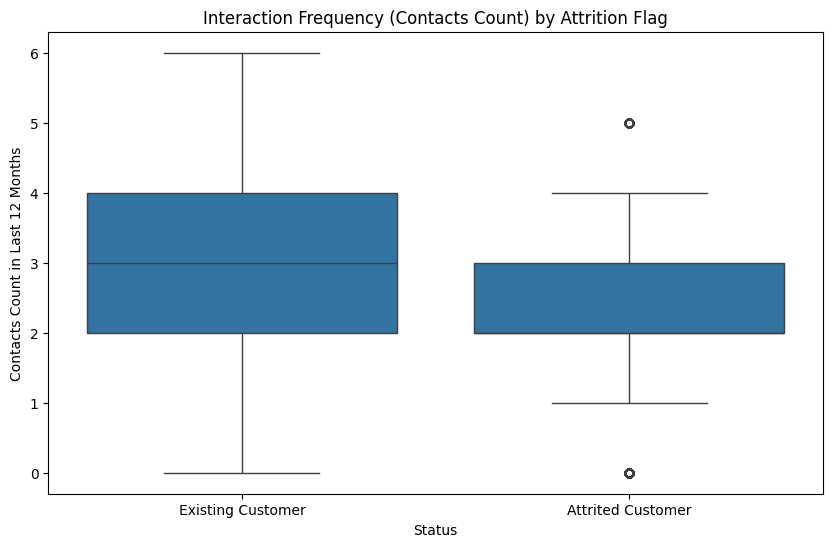

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train, y=X_train['contacts_count_12_mon'])
plt.title('Interaction Frequency (Contacts Count) by Attrition Flag')
plt.xlabel('Status')
plt.ylabel('Contacts Count in Last 12 Months')
plt.xticks([0, 1], ['Existing Customer', 'Attrited Customer'])
plt.show()

The boxplot for customer interactions with the bank over the last 12 months reveals a substantial difference in contact frequency between attrited and existing customers. Existing customers have a notably higher median and overall range of contact counts, suggesting that more frequent interactions may help maintain customer loyalty. In contrast, attrited customers exhibit a much lower average interaction count, indicating that less engagement could be a strong indicator of potential attrition. This trend suggests that encouraging regular touchpoints or increasing engagement opportunities with lower-contact customers may help reduce attrition rates.

**Correlation Heatmap**

<Axes: >

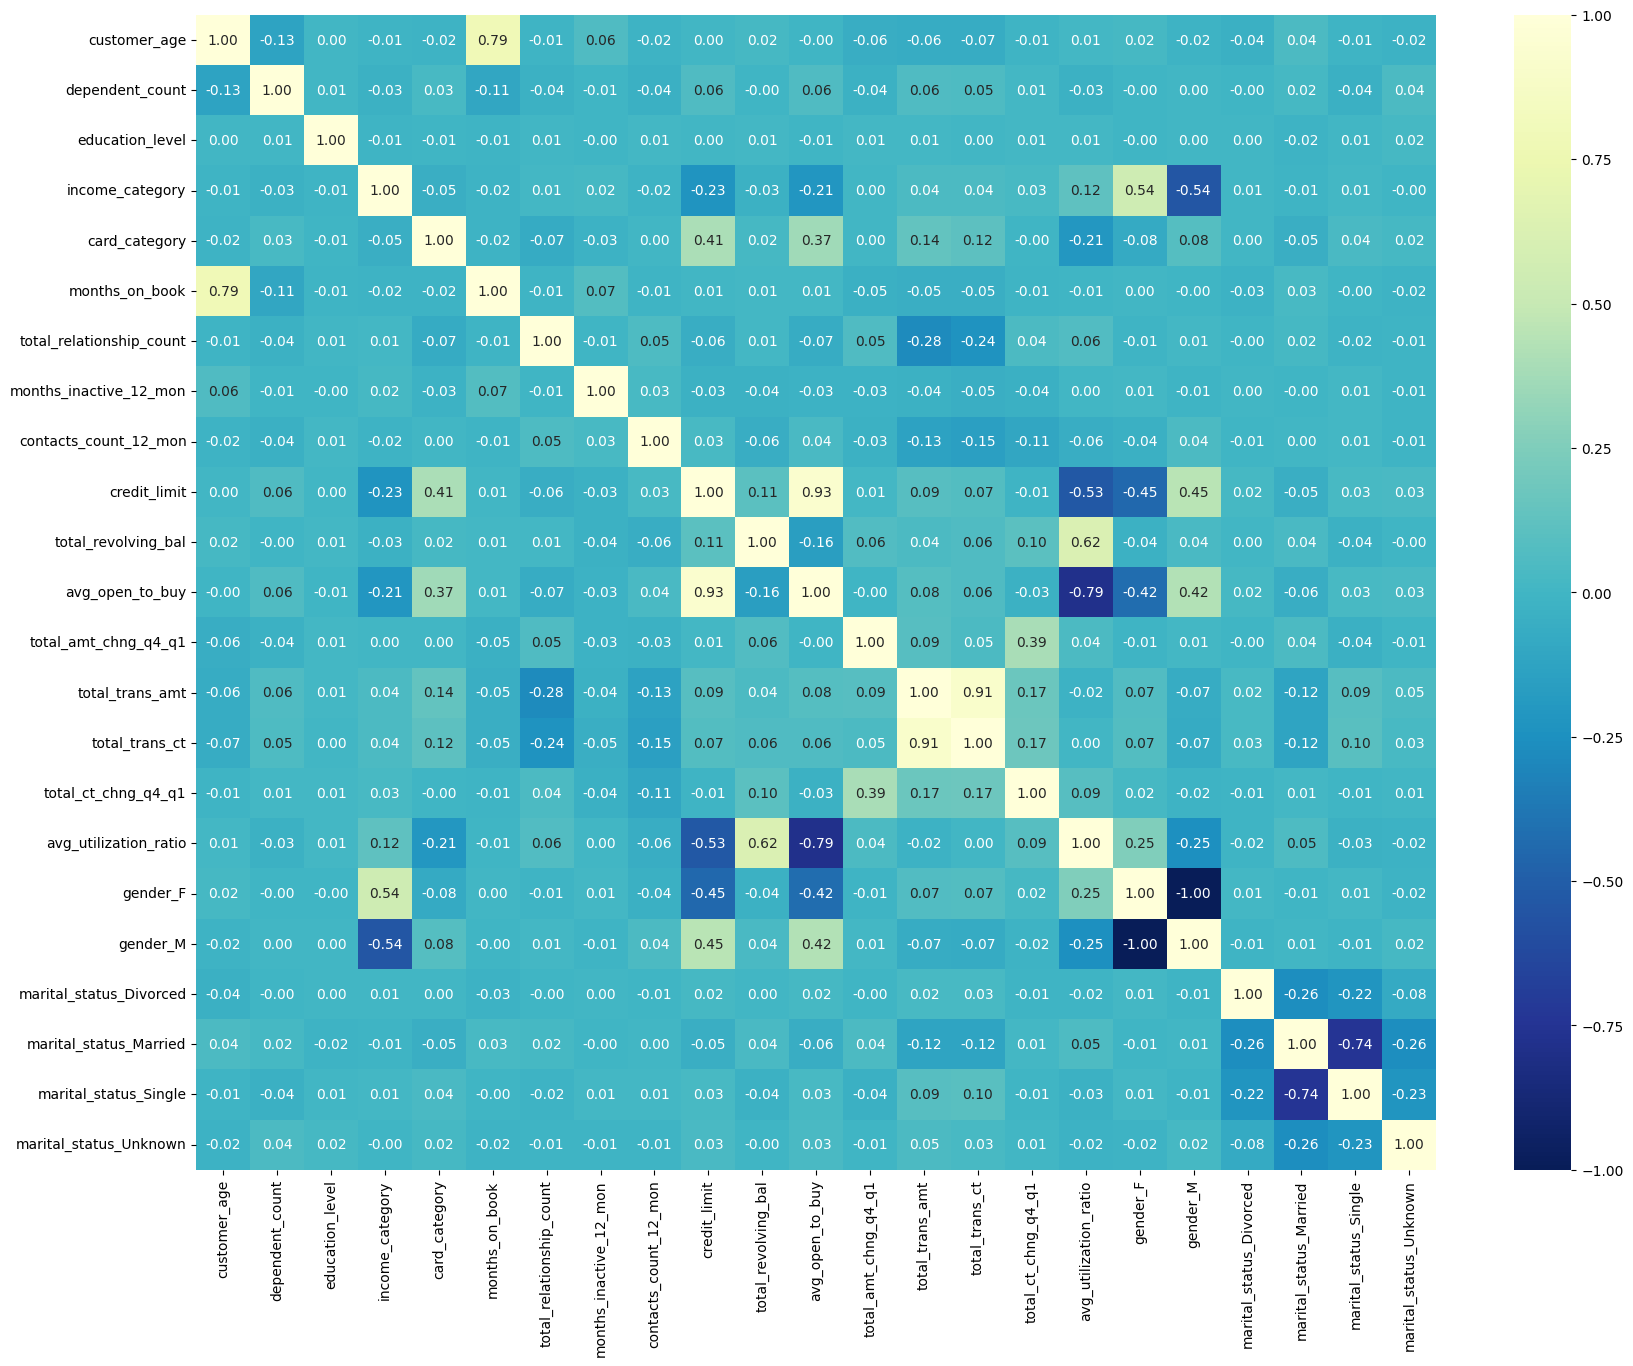

In [26]:
#create heatmap
corr_= X_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="YlGnBu_r")

The `avg_open_to_buy` and `credit_limit` columns are highly correlated (>0.8), and so are `total_trans_amt`and `total_trans_ct`. Consider dropping one of each correlated columns to reduce model complexity and improve interpretability.

In [27]:
#drop redundant features
X_train = X_train.drop(columns=['avg_open_to_buy','total_trans_ct'], axis = 1)
X_test = X_test.drop(columns=['avg_open_to_buy','total_trans_ct'], axis = 1)

<Axes: >

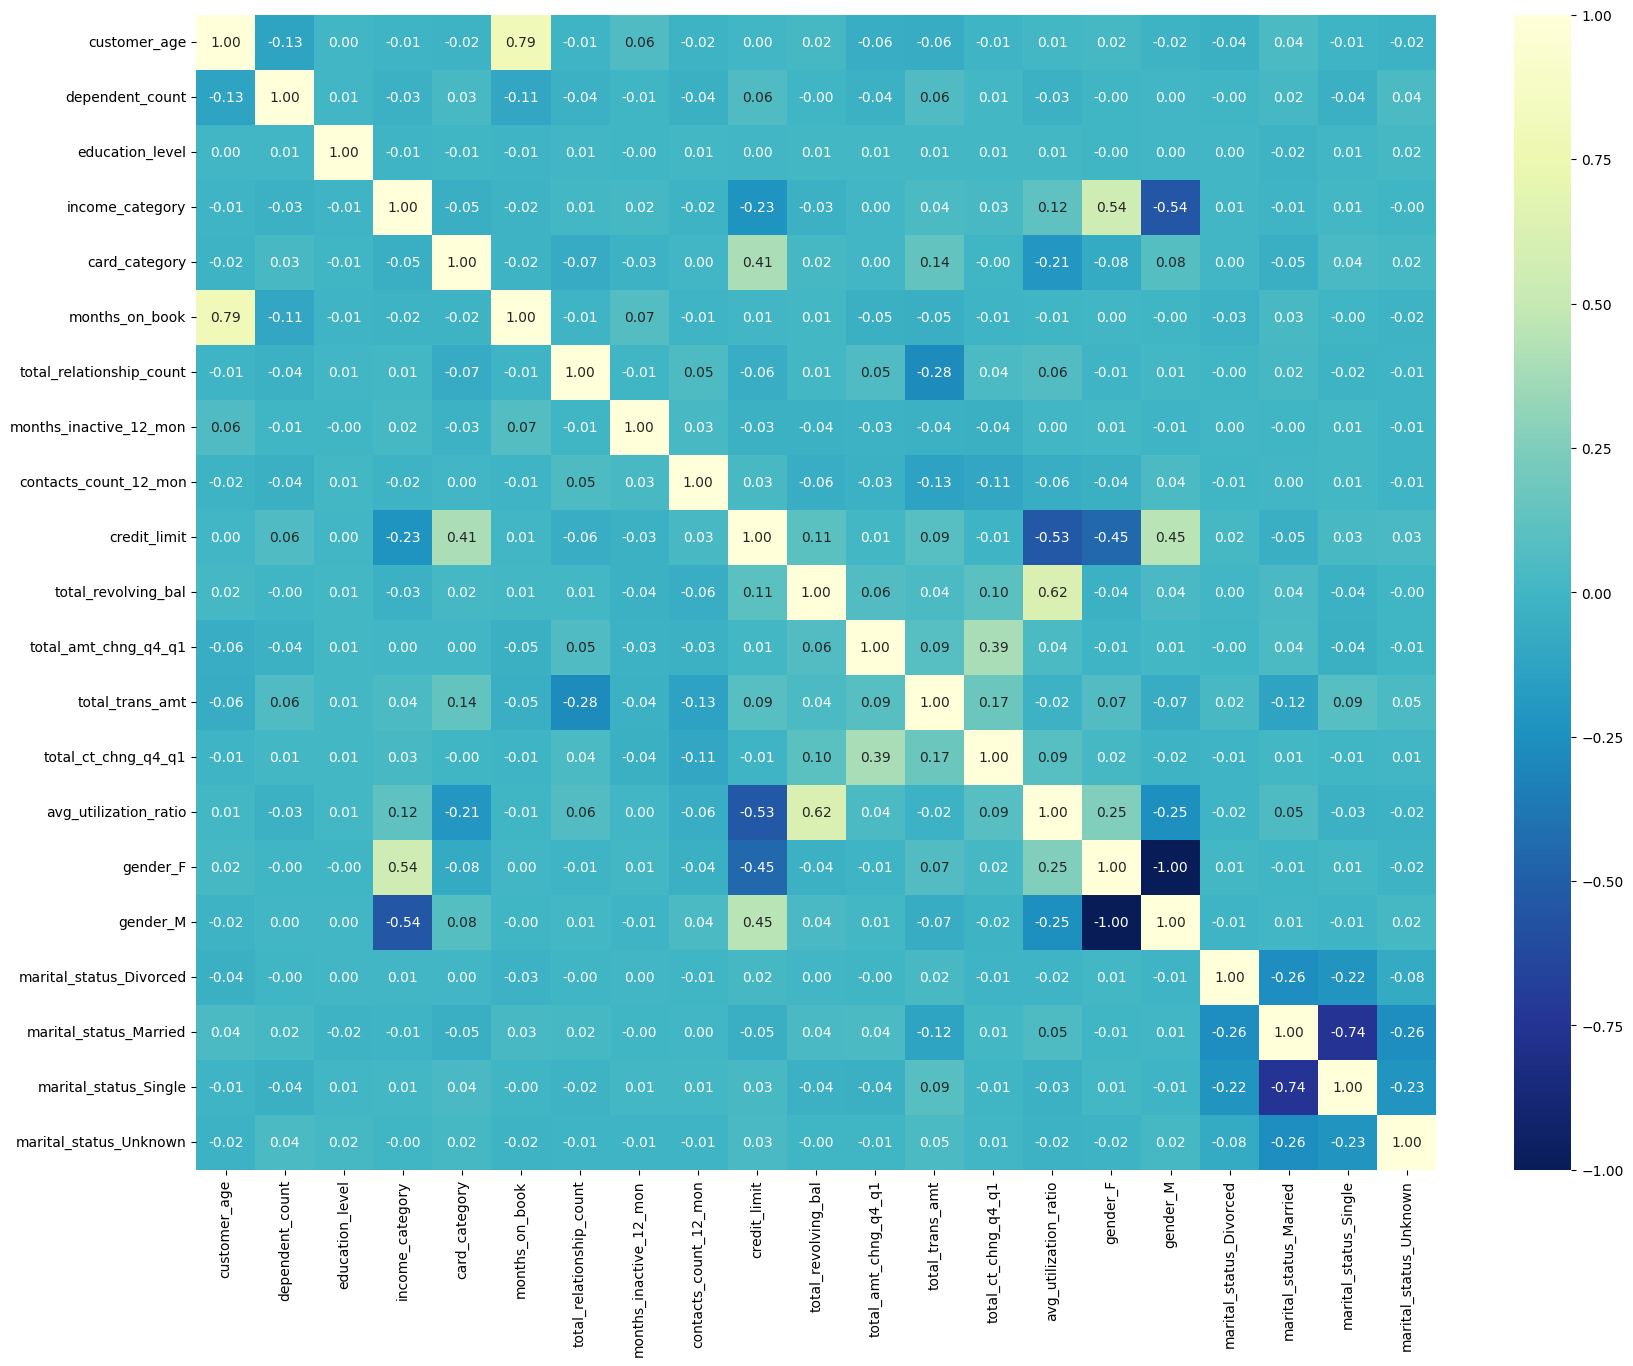

In [28]:
#check
corr_= X_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="YlGnBu_r")

There are no more highly multicollinear features.

## Model Prediction

To figure out which model is the best, we will create three different models and evaluate:
- Decision Tree (base model)
- Random Forest
- XGBoost

### Decision Tree

In [29]:
#define
decision_tree = DecisionTreeClassifier(
    random_state = 1000
    )
#fit
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1000)

### Random Forest

In [30]:
#define
random_forest = RandomForestClassifier(
    random_state = 1000,
    n_estimators = 100
    )
#fit
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

### XGBoost

In [31]:
#define
xgb = XGBClassifier(
    random_state = 1000
    )
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

## Model Evaluation

In [34]:
#decision tree
#prediction
dt_pred = decision_tree.predict(X_test)
dt_pred_proba = decision_tree.predict_proba(X_test)
#result
pd.DataFrame(metrics.classification_report(y_test, dt_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.748485,0.954009,0.920533,0.851247,0.921040
recall,0.760000,0.951205,0.920533,0.855603,0.920533
f1-score,0.754198,0.952605,0.920533,0.853402,0.920778
support,325.000000,1701.000000,0.920533,2026.000000,2026.000000


In [35]:
#random forest
#prediction
rf_pred = random_forest.predict(X_test)
rf_pred_proba = random_forest.predict_proba(X_test)
#result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.904580,0.950113,0.944225,0.927347,0.942809
recall,0.729231,0.985303,0.944225,0.857267,0.944225
f1-score,0.807496,0.967388,0.944225,0.887442,0.941739
support,325.000000,1701.000000,0.944225,2026.000000,2026.000000


In [36]:
#XGBoost
#prediction
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)
#result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.903537,0.974344,0.963475,0.938941,0.962986
recall,0.864615,0.982363,0.963475,0.923489,0.963475
f1-score,0.883648,0.978337,0.963475,0.930993,0.963148
support,325.000000,1701.000000,0.963475,2026.000000,2026.000000


**Interpretation:**

- The Decision Tree model performs well with positive f1-score of 95.26%, showing decent precision and recall for both classes but slightly lower precision and recall.
- The Random Forest model has an f1-score of 96.74% with higher precision for both classes, but lower recall for the negative class compared to Decision Tree.
- XGBoost reaches an f1-score of 97.83%, with the highest precision and recall for both classes.

In summary, **XGBoost** is the best-performing model overall due to its superior accuracy and balanced performance across precision, recall, and F1 scores. This makes XGBoost the most reliable model for identifying customer churn, as it minimizes both false positives and false negatives. We will proceed with XGBoost from now.

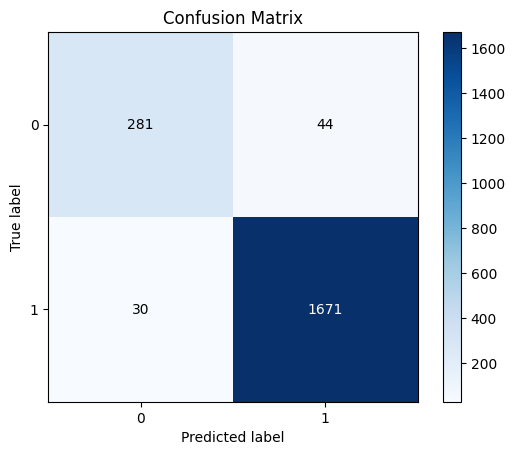

In [37]:
#confusion matrix of xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

It can be seen that the XGBoost model could predict positives correctly 1671 times out of the total, and correctly predict negatives 281 times out of total.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


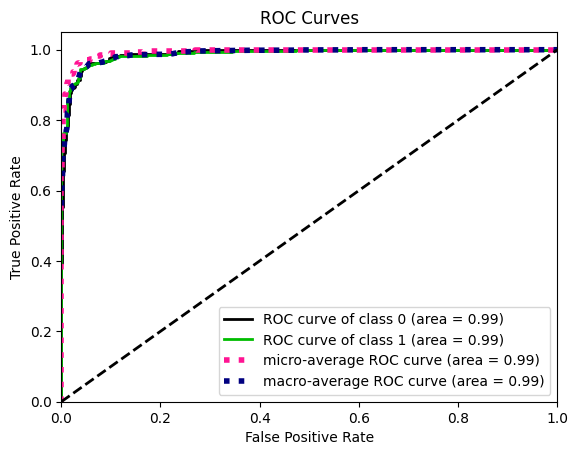

In [38]:
#ROC-AUC of xgboost result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

The Receiver Operating Characteristic (ROC) Curve plots true positive rate (sensitivity) against false positive rate (1-specificity), showing how well the model can distinguish between the positive and negative classes. The Area Under the Curve (AUC) reaches very close to 1.0, indicating an ideal performnance.

## Exploratory Model Analysis

In [41]:
#initiate explainer
attrition_xgb_exp = dx.Explainer(xgb, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f2b9049b9a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 8.16e-06, mean = 0.839, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.477, mean = 2.39e-06, max = 0.647
  -> model_info        : package xgboost

A new explainer has been created!


### Feature Importance

In [42]:
#visualize permutation feature importance for XGBoost model
attrition_xgb_exp.model_parts().plot()

The analysis reveals that `total_trans_amt` (total nominal transaction in the last 12 months) is the most significant predictor of customer churn, indicating a strong positive influence where higher transaction amounts may correlate with lower attrition rates. While those with a score of +0.008 and +0.006 suggests that they have a limited effect on distinguishing between churned and existing customers. Other features with scores of contribute negligibly to the attrition prediction model, suggesting they may be less relevant for analysis.

### Partial Dependence Plot

In [43]:
attrition_xgb_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/21 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.47 26.94 ... 72.06 72.53 73.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.05 0.1  ... 4.9  4.95 5.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  10%|▉         | 2/21 [00:00<00:01, 12.94it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated an

The Partial Dependence Plot shows that `customer_age`, `dependent_count`, `education_level`, `income_category`, `card_category`, `months_on_book`, `months_inactive_12_mon`, `credit_limit`, and `avg_utilization_ratio` variables have no effect on the rate of attrition. Whereas `total_relationship_count`, `contacts_count_12_mon`, and `total_revolving_bal` did slightly effect the rate of retention.


It can be seen that the `total_trans_amt`, `total_amt_chng_q4_q1`, and `total_ct_chng_q4_q1` have the highest effect on customer attrition. It is recommended to consider implementing strategies that encourage higher transaction volumes, which could include offering incentives for larger purchases or promoting bundled services that increase transaction values. Thus, enhancing customer relationships through personalized services or loyalty programs which could lead to higher retention rates.